## Árvores de regressão - exercícios 02

Este exercício será uma continuação do anterior, mesma base, mesmas variáveis - vamos tentar buscar a 'melhor árvore'.

A descrição das variáveis está abaixo:

| Variavel | Descrição|
|-|-|
|CRIM| taxa de crimes per-cápita da cidade | 
|ZN| proporção de terrenos residenciais zoneados para lotes com mais de 25.000 pés quadrados. |
|INDUS| proporção de acres de negócios não varejistas por cidade |
|CHAS |vale 1 se o terreno faz fronteira com o *Charles River*; 0 caso contrário |
|NOX| Concentração de óxido nítrico (em partes por 10 milhões) |
|RM| número médio de quartos por habitação |
|AGE| proporção de unidades ocupadas pelo proprietário construídas antes de 1940 |
|DIS| distâncias ponderadas até cinco centros de empregos de Boston |
|RAD| índice de acessibilidade a rodovias radiais |
|TAX| taxa de imposto sobre a propriedade de valor total por \\$10,000 |
|PTRATIO| razão pupilo-professor da cidade |
|B| $ 1000 (Bk - 0,63) ^ 2 $ onde Bk é a proporção de negros por cidade |
|LSTAT| \%status inferior da população |
|MEDV| (variável resposta) Valor mediano das casas ocupadas pelo proprietário em US $ 1.000|

Observação: conforme notificado pelo sklearn, o uso do dataset Boston Housing foi desencorajado para prever preços de residências por conter uma coluna com problemáticas éticas/raciais. Desta forma, optei por realizar o download do dataset via URL e exluir a coluna B - onde Bk é a proporção de negros por cidade.

In [1]:
import pandas as pd
import numpy as np
import requests
from io import StringIO
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.tree import DecisionTreeRegressor
from sklearn import tree
from sklearn.model_selection import train_test_split

# URL for the Boston Housing dataset
data_url = "http://lib.stat.cmu.edu/datasets/boston"

# Fetching the data from the URL
response = requests.get(data_url)
data_text = response.text

# Parsing the relevant part of the text data
parsed_data = StringIO("\n".join(data_text.split("\n")[22:506]))

# Loading the data into a DataFrame
raw_df = pd.read_csv(parsed_data, sep="\s+", header=None)

# Reshaping the data into the correct format
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
target = raw_df.values[1::2, 2]

# Creating the feature names
feature_names = [
    "CRIM", "ZN", "INDUS", "CHAS", "NOX", "RM", "AGE", 
    "DIS", "RAD", "TAX", "PTRATIO", "B", "LSTAT"
]

# Creating the DataFrames for features and target
X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=['MEDV'])

# Remoção da coluna com viés e avaliação ética negativa
X = X.drop(columns=['B'])

X.head(), y.head()



(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 
    PTRATIO  LSTAT  
 0     15.3   4.98  
 1     17.8   9.14  
 2     17.8   4.03  
 3     18.7   2.94  
 4     18.7   5.33  ,
    MEDV
 0  24.0
 1  21.6
 2  34.7
 3  33.4
 4  36.2)

In [2]:
X.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33


In [3]:
y.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


### 1. Execute os passos do exercício anterior, até que você tenha uma árvore de regressão predizendo o valor do imóvel na base de treinamento.

In [4]:
#Concatenando os dois Dfs
#combinando os DFs em um único
concact_dfs = pd.concat([X, y], axis =1)

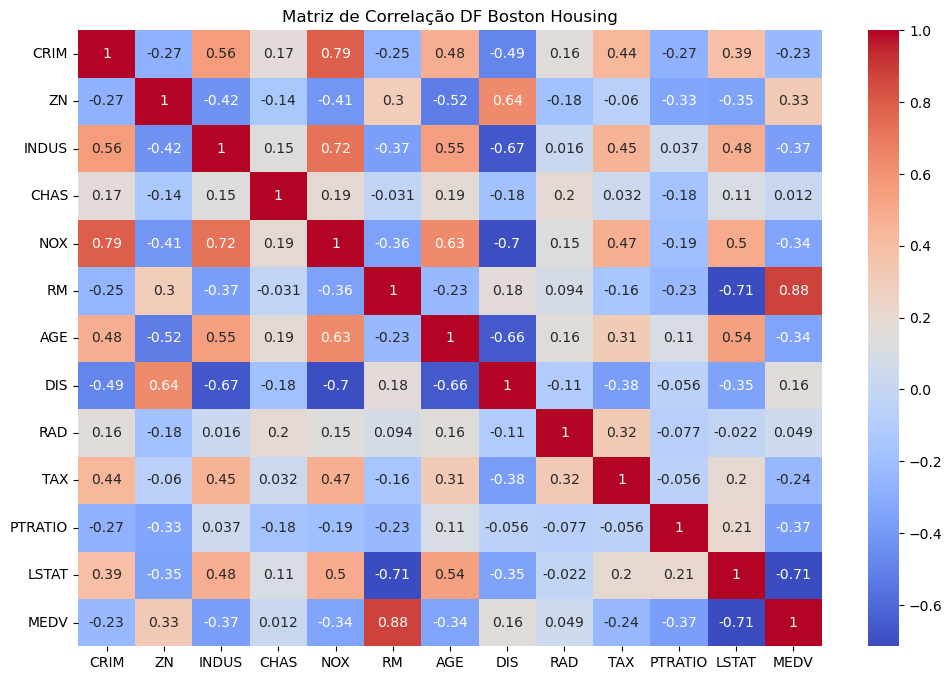

In [5]:
#Criando a matrix de correlação
corr_matrix = concact_dfs.corr()


#Plotando o heatmap com seaborn
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title("Matriz de Correlação DF Boston Housing")
plt.show()

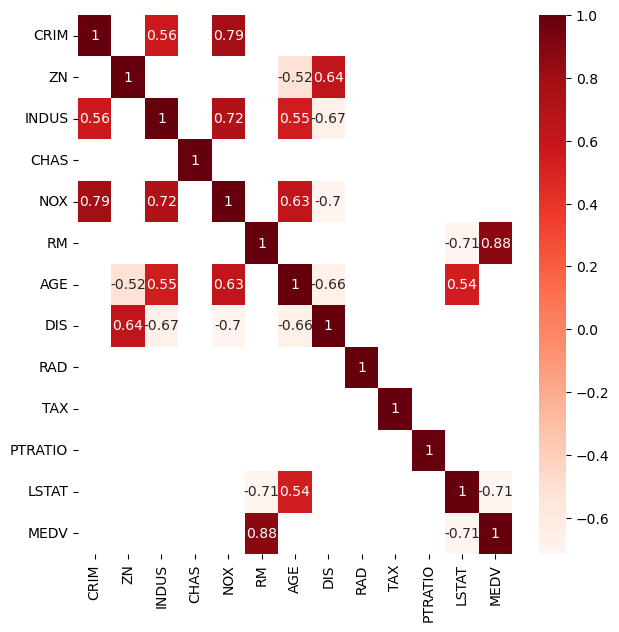

In [6]:
#Embora a correlação possa ser examinada visualmente, optei por selecionar as variáveis mais correlacionados com abs()>= 0.5

high_corr = corr_matrix[(corr_matrix.abs() >= 0.5)]
plt.figure(figsize=(7,7 ))
sns.heatmap(high_corr, annot=True, cmap='Reds')
plt.show()



A abordagem acima apresentou as variáveis mais correlacionadas tanto positiva quanto negativamente. Embora os modelos de Árvores de Regressão costumam performar bem mesmo com o uso de todas as variáveis numéricas disponíveis. Acredito que um teste extra com as a variáveis mais correlacionadas (e a comparação dos respectivos resultados) possam apresentar bons resultados.

Baseando-nos na análise do heatmap acima podemos extrair alguns insights interessantes:

Relação entre Criminalidade e Poluição: A forte correlação positiva entre a taxa de criminalidade (CRIM) e a concentração de óxidos nítricos (NOX) pode sugerir que áreas com maior criminalidade também são propensas a ter maior poluição do ar. Isso pode refletir uma concentração de desvantagens socioeconômicas em determinadas áreas, onde fatores como pobreza e planejamento urbano deficiente convergem.

Qualidade do Ar e Distância dos Centros de Emprego: A correlação negativa entre NOX e a distância ponderada dos centros de emprego (DIS) pode indicar que áreas mais afastadas dos centros de emprego tendem a ter ar mais limpo. Isso pode ser usado para argumentar a favor de políticas de zoneamento que separam áreas residenciais de áreas industriais ou comerciais para melhorar a qualidade do ar residencial.

Estrutura Habitacional e Valor da Propriedade: O número de quartos (RM) tem uma correlação positiva significativa com o valor médio das casas ocupadas pelos proprietários (MEDV). Este é um ponto intuitivo e robusto que reforça a ideia de que uma maior área habitacional (representada pelo número de quartos) é um fator chave no valor de uma propriedade.

Status Socioeconômico e Valor da Propriedade: A correlação negativa entre LSTAT (percentual de status mais baixo da população) e MEDV destaca a associação entre condições socioeconômicas mais baixas e preços mais baixos de habitação. Isso pode indicar que investimentos em educação, emprego e infraestrutura poderiam potencialmente elevar o valor das propriedades em áreas desfavorecidas.

Indicadores de Desenvolvimento Industrial: A forte correlação entre INDUS (proporção de acres de negócios não varejistas por cidade) e NOX pode ser um indicativo de que áreas com maior desenvolvimento industrial têm níveis mais elevados de poluentes do ar. Isso pode ser relevante para discussões sobre o equilíbrio entre desenvolvimento econômico e proteção ambiental.

Idade da Propriedade e Qualidade do Ar: A correlação positiva entre a proporção de unidades ocupadas pelo proprietário construídas antes de 1940 (AGE) e NOX pode indicar que áreas mais antigas têm pior qualidade do ar, possivelmente devido à falta de regulamentações ambientais no momento da construção ou à proximidade de áreas industriais estabelecidas.

Infraestrutura e Planejamento Urbano: As correlações observadas no heatmap podem refletir padrões mais amplos de planejamento urbano e infraestrutura. Por exemplo, a correlação entre RAD (índice de acessibilidade às rodovias radiais) e TAX (taxa de imposto sobre a propriedade de valor total por $10.000) pode ser explorada para discutir como a infraestrutura de transporte influencia a política fiscal local e o desenvolvimento urbano.

In [7]:
#Retomando o DF original
data = concact_dfs.copy()
data.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [8]:
#Dividindo o conjunto para trteino e teste
from sklearn.model_selection import train_test_split

X = data.drop("MEDV", axis=1) #drop é função () de exclusão da coluna
y = data['MEDV'] #utiliza-se[] para agregação da coluna

#Dividindo os dados em conjuntos de treino e teste
# Mantendo 70% dos dados para treino e 30% para teste
# O parâmetro 'random_state' garante a reprodutibilidade (seed 42 opção)

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3, random_state=42)

#Separando o conjunto (da base teste) com 10% dos dados para avaliação: Para este exercício optei por utilizar todo o conjunto
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.143, random_state=42)

In [9]:
#Utilizando DecisionTreeRegressor - árvore de decisão para regressão - modelo para para prever um valor cóntínuo
#Com profundidade máxima = 8
regressor_depth_8 = DecisionTreeRegressor(max_depth=8)
#Treinando o modelo
regressor_depth_8.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=8)

In [10]:
from sklearn.metrics import mean_squared_error

#fazendo previsões para a árvore com profundidade = 8
train_predictions_depth_8 = regressor_depth_8.predict(X_train)
test_predictions_depth_8 = regressor_depth_8.predict(X_test)

# Calculando MSE para árvore com profundidade máxima = 8
mse_train_depth_8 = mean_squared_error(y_train, train_predictions_depth_8)
mse_test_depth_8 = mean_squared_error(y_test, test_predictions_depth_8)

print(f" Árvore de regressão com profundidade = 8: MSE Treinamento = {mse_train_depth_8}, MSE teste = {mse_test_depth_8}")

 Árvore de regressão com profundidade = 8: MSE Treinamento = 0.5996720202874048, MSE teste = 14.93586830056223


Análise dos resultados:

MSE de Treinamento (0.5997): Este é um valor relativamente baixo, o que sugere que o modelo se ajustou bem aos dados de treino. O modelo foi capaz de capturar a maior parte da variação nos dados de treino.

MSE de Teste (14.9359): Este valor é significativamente maior do que o MSE de treinamento. Um aumento no MSE do treino para o teste é esperado, pois os modelos geralmente têm um desempenho um pouco pior em dados não vistos. No entanto, a grande diferença entre os dois valores é um indicativo de overfitting.

Análise do Overfitting:

Overfitting ocorre quando um modelo se ajusta tão bem aos dados de treino que acaba capturando o ruído e as peculiaridades dos dados de treino em vez de aprender padrões generalizáveis.
Neste caso, a árvore de decisão parece estar capturando detalhes específicos do conjunto de treino que não se aplicam aos dados em geral, resultando em um desempenho pobre no conjunto de teste.

In [11]:
import sklearn
print(sklearn.__version__)


1.3.2


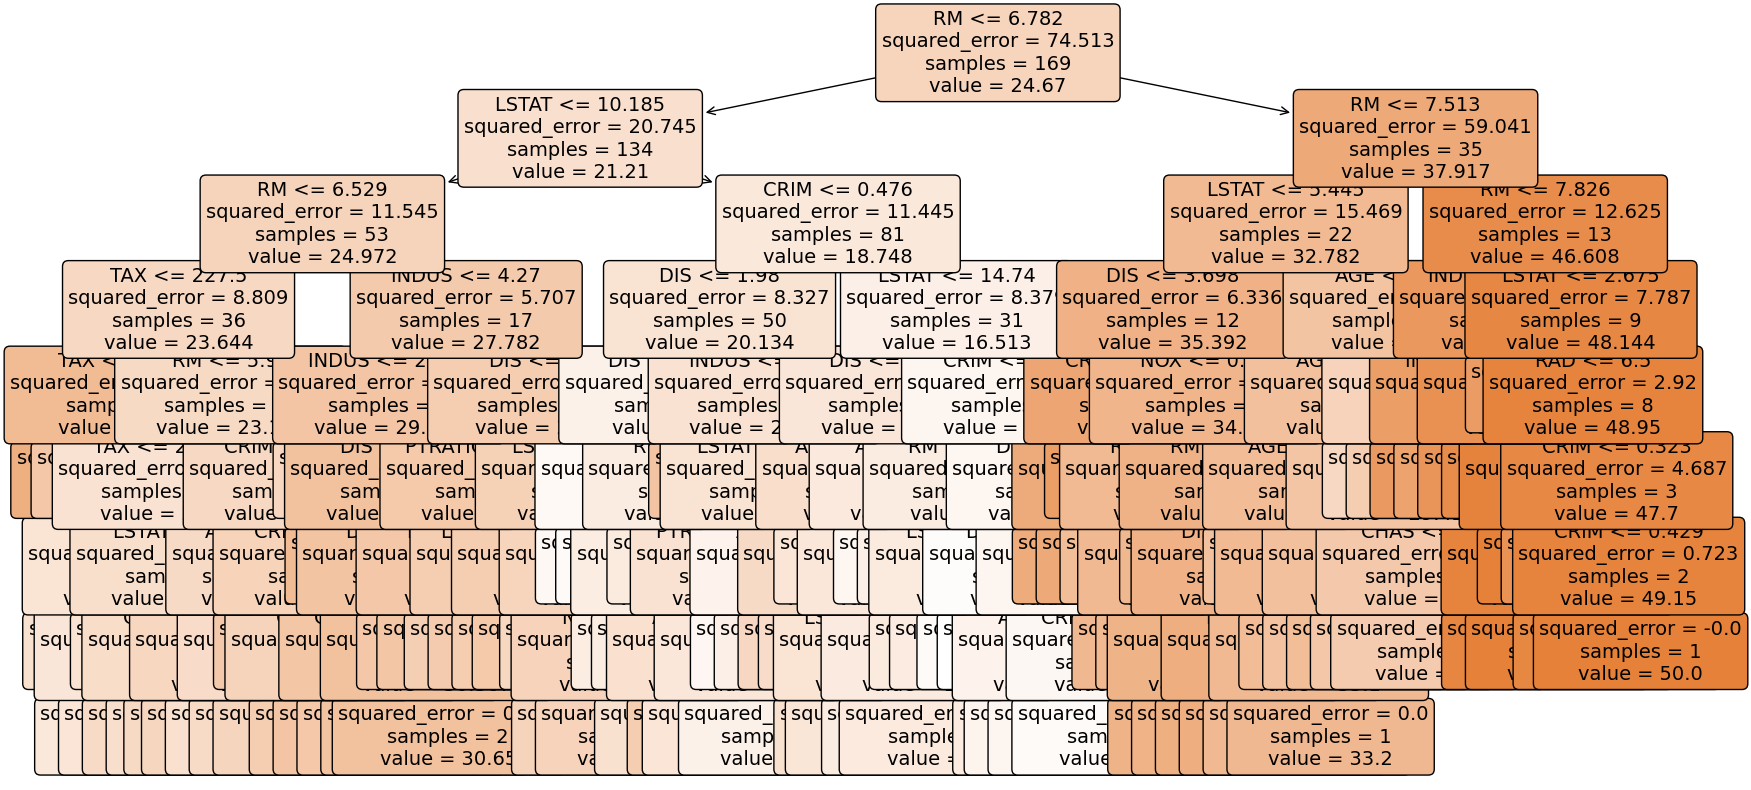

In [20]:
#Plotando a árvore com profundidade 8 para posterior comparação com os resultados da pós poda 
plt.figure(figsize=(20,10)) #definindo a figura e seu tamanho
a = plot_tree(regressor_depth_8, 
              feature_names=X_train.columns, 
              class_names=y_train, 
              filled=True, 
              rounded=True, 
              fontsize=14)
plt.show()

### 2.  Calcule o caminho indicado pelos CCP-alfas dessa árvore.

In [12]:
path = regressor_depth_8.cost_complexity_pruning_path(X_train, y_train)
path



{'ccp_alphas': array([0.00000000e+00, 2.95857988e-05, 2.95857988e-05, 1.18343195e-04,
        1.18343195e-04, 1.57790927e-04, 2.66272189e-04, 2.66272189e-04,
        4.73372781e-04, 1.44970414e-03, 1.44970414e-03, 1.44970414e-03,
        1.66666667e-03, 2.39644970e-03, 2.52465483e-03, 2.85009862e-03,
        2.95857988e-03, 2.95857988e-03, 4.26035503e-03, 4.77317554e-03,
        5.21696252e-03, 5.32544379e-03, 6.65680473e-03, 7.18934911e-03,
        7.57396450e-03, 7.73175542e-03, 8.55029586e-03, 8.55029586e-03,
        8.87573964e-03, 1.08500047e-02, 1.08925049e-02, 1.20808679e-02,
        1.20808679e-02, 1.30473373e-02, 1.52741617e-02, 1.52741617e-02,
        1.84911243e-02, 2.01203156e-02, 2.02514793e-02, 2.48816568e-02,
        2.62771203e-02, 2.66666667e-02, 2.84319527e-02, 3.07810651e-02,
        3.25619893e-02, 3.30500269e-02, 3.34122288e-02, 3.64181460e-02,
        3.64812623e-02, 4.15532544e-02, 4.63422671e-02, 4.69526627e-02,
        5.11242604e-02, 5.54733728e-02, 5.63831361

### 3. Paca cada valor de alpha obtido no item 2, treine uma árvore com o respectivo alfa, e guarde essa árvore em uma lista.

In [13]:
from sklearn.tree import DecisionTreeRegressor

# Lista para armazenar as árvores treinadas
regressors = []

# Iterar sobre os valores de ccp_alphas (exceto o último valor)
for ccp_alpha in path['ccp_alphas'][:-1]: #exceto o último, que representa a árvore totalmente podada até apenas um nó 
    # Criando e treinando a árvore de decisão com o valor atual de ccp_alpha
    regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=ccp_alpha)
    regressor.fit(X_train, y_train)

    # Adicionar a árvore treinada à lista
    
    regressors.append(regressor)

# Com o append,'regressors' contém todas as árvores treinadas com diferentes valores de ccp_alpha



### 4. Para cada árvore na lista, calcule o MSE da árvore.

In [14]:
from sklearn.metrics import mean_squared_error

# Listas para armazenar os MSEs
mse_train = []
mse_test = []

# Iterar sobre cada árvore na lista de regressores
for regressor in regressors:
    # Fazendo previsões
    train_predictions = regressor.predict(X_train)
    test_predictions = regressor.predict(X_test)

    # Calculando MSE para cada árvore
    mse_train.append(mean_squared_error(y_train, train_predictions))
    mse_test.append(mean_squared_error(y_test, test_predictions))

# Agora, 'mse_train' contém os MSEs de treinamento e 'mse_test' contém os MSEs de teste para cada valor de ccp_alpha


### 5. Monte um gráfico do MSE pelo alpha, escolha um valor de alpha perto do ponto de mínimo do MSE

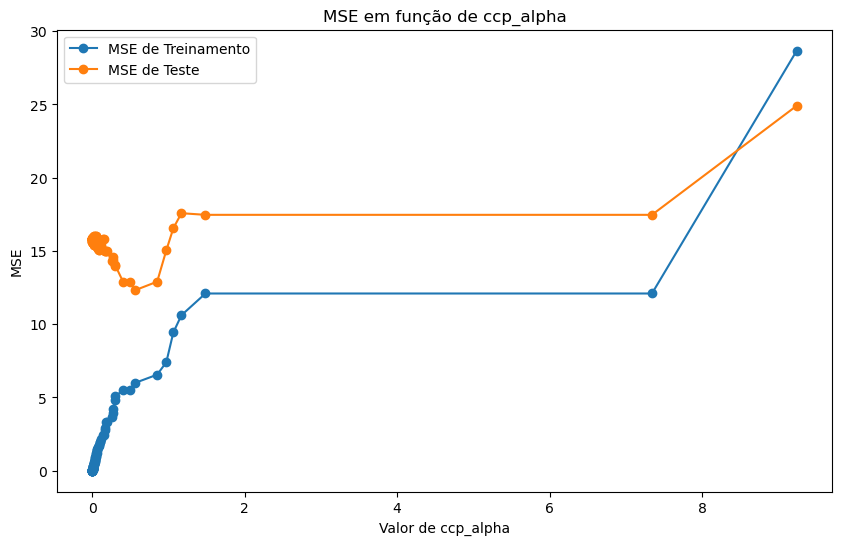

In [15]:
ccp_alphas = path['ccp_alphas'][:-1]  # Excluindo novamente o último valor de ccp_alpha

# Plotando MSE de treinamento e teste em função de ccp_alpha
plt.figure(figsize=(10, 6))
plt.plot(ccp_alphas, mse_train, label="MSE de Treinamento", marker='o') 
plt.plot(ccp_alphas, mse_test, label="MSE de Teste", marker='o')
# No eixo x = ccp_alphas (-1), no eixo y = listas com mse_train e e mse_test

# Adicionando títulos e rótulos
plt.title("MSE em função de ccp_alpha")
plt.xlabel("Valor de ccp_alpha")
plt.ylabel("MSE")
plt.legend()

plt.show()



Interpretando o gráfico:
Para encontrarmos um valor ótimo de ccp_alpha, devemos identifificar o ponto mais baixo do mse de teste. Notamos que este ponto ótimo está em aproximadamente 0,5. Percebemos que após este valor, tanto o mse de teste quanto o mse de treinamento começam a subir, indicando erros maiores conforme a quantidade de nos aumenta em nossa árvore

Embora a visualização gráfica do ponto ótimo do nosso ccp alpha seja uma excelente opção, podemos refinar ainda mais a nossa escolha de forma programática conforme abaixo:

In [16]:
# Encontrar o índice do valor mínimo do MSE de teste
index_min_mse_test = mse_test.index(min(mse_test))

# Encontrar o valor de alpha correspondente
optimal_ccp_alpha = ccp_alphas[index_min_mse_test]
print(f"O valor ótimo de ccp_alpha é: {optimal_ccp_alpha}")


O valor ótimo de ccp_alpha é: 0.561799999999784


Através do código acima, ao obter o valor 0.56, nossa hipótese de que o valor ótimo do nosso ccp alpha estava em aprox 0.5 se confirma. 

In [17]:
# Treinando o modelo final com o ccp_alpha ótimo
final_regressor = DecisionTreeRegressor(random_state=42, ccp_alpha=optimal_ccp_alpha)
final_regressor.fit(X_train, y_train)

# Avaliando o desempenho do modelo final no conjunto de teste
final_predictions = final_regressor.predict(X_test)
# atribuindo em final_mse / comparando os valores reais de y_test com final_predictions
final_mse = mean_squared_error(y_test, final_predictions) 

print(f"O MSE do modelo final no conjunto de teste é: {final_mse}")


O MSE do modelo final no conjunto de teste é: 12.313840240259374


Conclusão sobre o modelo com ccp alpha otimizado:

Redução de Overfitting: A poda da árvore usando o valor ótimo de ccp_alpha ajudou a reduzir o overfitting, que era um problema na árvore inicial mais profunda.

Melhoria no Desempenho: A árvore podada apresentou um MSE de teste menor (12.3138) comparado ao da árvore inicial (14.9359), indicando uma melhoria na capacidade de generalização do modelo para dados não vistos.

Equilíbrio Otimizado: A poda ajudou a encontrar um melhor equilíbrio entre a complexidade do modelo e sua precisão, resultando em um modelo que nem se ajusta demais aos dados de treino nem é excessivamente simplificado.

### 6. Calcule o R-quadrado dessa árvore encontrada no item acima

In [18]:
from sklearn.metrics import r2_score

# Calculando o R-quadrado para o modelo final no conjunto de teste
final_r2 = r2_score(y_test, final_predictions)

print(f"O R-quadrado do modelo final no conjunto de teste é: {final_r2}")


O R-quadrado do modelo final no conjunto de teste é: 0.8104284252074766


R-quadrado de 0.8104 é um indicativo forte de que o modelo está fazendo um bom trabalho em prever os valores das propriedades no conjunto de teste. 

### 7. Visualize esta árvore.

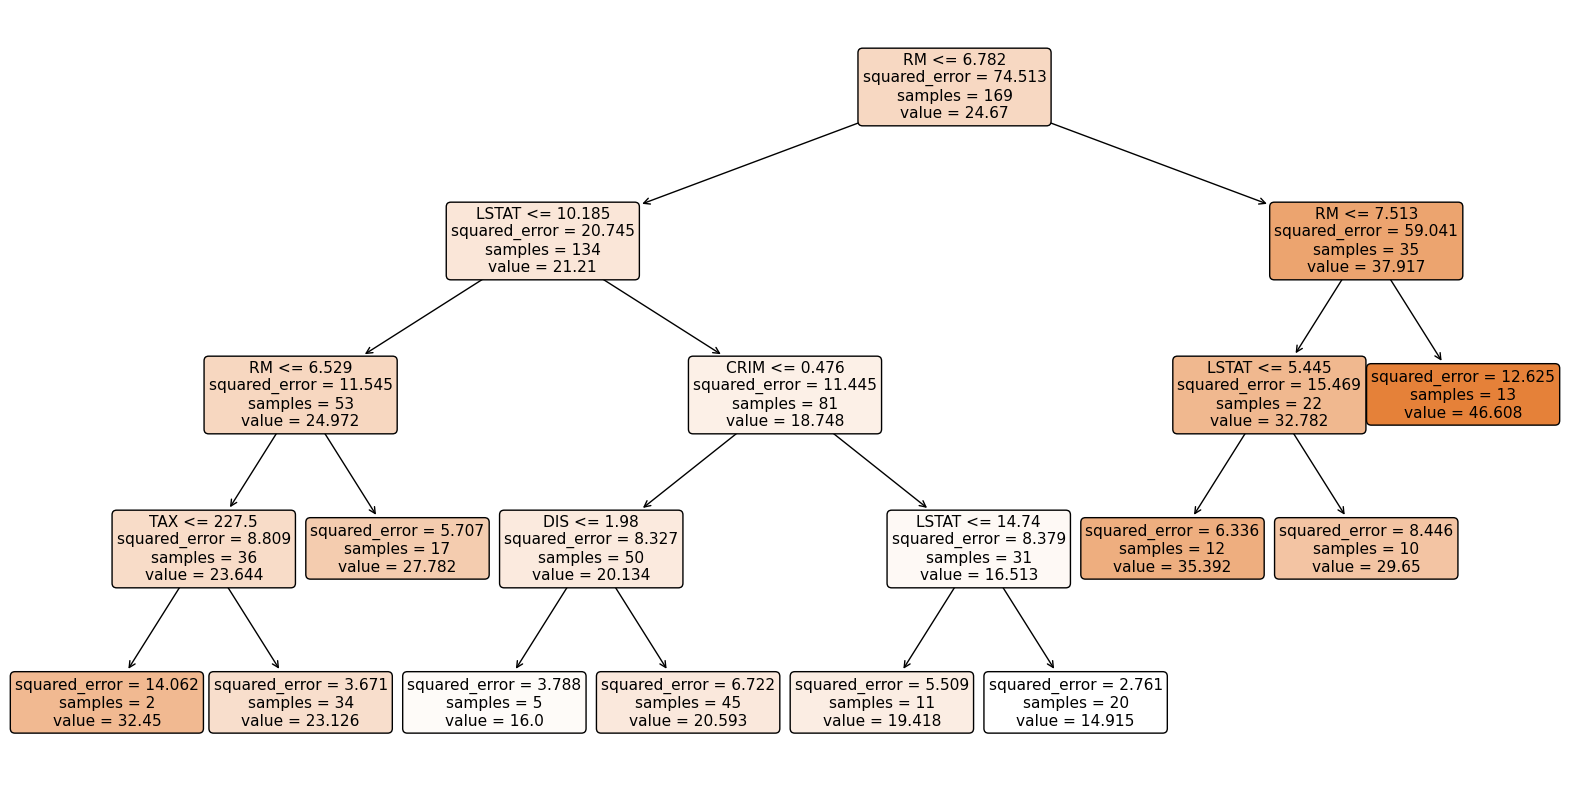

In [19]:

from sklearn.tree import plot_tree


plt.figure(figsize=(20,10))


plot_tree(final_regressor, 
          filled=True, 
          rounded=True, 
          feature_names=X.columns, 
          class_names=['MEDV'])
plt.show()


Conclusão: Os resultados obtidos pelas métricas MSE e R-quadrado confirmam que a redução do número de nós obtidos através da utilização do ccp_alpha optimizado (0.56) em nosso modelo, foi mais eficiente quando comparados com as métricas da nossa primeira Árvore de Regressão com profundidade = 8. 